In [77]:
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("data.csv")
target=pd.read_csv("target.csv")

In [3]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,0.001,1.737192,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500
1,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,0.001,1.777445,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000
2,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,0.001,1.685355,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000
3,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,0.001,1.687490,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000
4,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,0.001,1.737626,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364


In [4]:
target.head()

,shares,sharesB,sharesLog
0,593,0,6.385194
1,711,0,6.566672
2,1500,1,7.313220
3,1200,0,7.090077
4,505,0,6.224558


In [5]:
xgbClassifier=xgb.XGBClassifier()
score=cross_val_score(xgbClassifier,X=data,y=target.sharesB,scoring='roc_auc',cv=5)
print(np.mean(score))

0.695892527108


In [13]:
paramTest1={'n_estimators':list(range(150,251,20))}
gridSearch1=GridSearchCV(estimator= xgb.XGBClassifier(learning_rate=0.05),
                         param_grid=paramTest1,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gridSearch1.fit(data,target.sharesB)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [150, 170, 190, 210, 230, 250]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [12]:
gridSearch1.grid_scores_,gridSearch1.best_params_,gridSearch1.best_score_

([mean: 0.70071, std: 0.05013, params: {'n_estimators': 151},
  mean: 0.69935, std: 0.05079, params: {'n_estimators': 171},
  mean: 0.69656, std: 0.05385, params: {'n_estimators': 191},
  mean: 0.69378, std: 0.05713, params: {'n_estimators': 211},
  mean: 0.69301, std: 0.05804, params: {'n_estimators': 231}],
 {'n_estimators': 151},
 0.700709053221675)

In [19]:
paramTest2={"max_depth":list(range(1,8,1))}
gridSearch2=GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.05,n_estimators=150),
                         param_grid=paramTest2,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gridSearch2.fit(data,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [20]:
gridSearch2.grid_scores_,gridSearch2.best_params_,gridSearch2.best_score_

([mean: 0.69950, std: 0.03114, params: {'max_depth': 1},
  mean: 0.70177, std: 0.04211, params: {'max_depth': 2},
  mean: 0.70114, std: 0.05013, params: {'max_depth': 3},
  mean: 0.69293, std: 0.05797, params: {'max_depth': 4},
  mean: 0.68626, std: 0.06637, params: {'max_depth': 5},
  mean: 0.68127, std: 0.06858, params: {'max_depth': 6},
  mean: 0.67482, std: 0.07108, params: {'max_depth': 7}],
 {'max_depth': 2},
 0.7017726779338945)

In [21]:
paramTest3={"gamma":list(range(0,9,1))}
gridSearch3=GridSearchCV(estimator=xgb.XGBClassifier(max_depth=2,n_estimators=150,learning_rate=0.05),
                        param_grid=paramTest3,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gridSearch3.fit(data,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [22]:
gridSearch3.grid_scores_,gridSearch3.best_params_,gridSearch3.best_score_

([mean: 0.70177, std: 0.04211, params: {'gamma': 0},
  mean: 0.70177, std: 0.04211, params: {'gamma': 1},
  mean: 0.70177, std: 0.04211, params: {'gamma': 2},
  mean: 0.70177, std: 0.04211, params: {'gamma': 3},
  mean: 0.70177, std: 0.04211, params: {'gamma': 4},
  mean: 0.70177, std: 0.04211, params: {'gamma': 5},
  mean: 0.70177, std: 0.04211, params: {'gamma': 6},
  mean: 0.70177, std: 0.04211, params: {'gamma': 7},
  mean: 0.70177, std: 0.04211, params: {'gamma': 8}],
 {'gamma': 0},
 0.7017726779338945)

In [47]:
paramTest4={"min_child_weight":list(range(0,11,1))}
gridSearch4=GridSearchCV(estimator=xgb.XGBClassifier(max_depth=3,n_estimators=40,gamma=7),
                        param_grid=paramTest4,scoring='roc_auc',iid=False,cv=5,n_jobs=4)
gridSearch4.fit(data,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=7, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=40, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [48]:
gridSearch4.grid_scores_,gridSearch4.best_params_,gridSearch4.best_score_

([mean: 0.69849, std: 0.04751, params: {'min_child_weight': 0},
  mean: 0.69849, std: 0.04751, params: {'min_child_weight': 1},
  mean: 0.69849, std: 0.04751, params: {'min_child_weight': 2},
  mean: 0.69853, std: 0.04758, params: {'min_child_weight': 3},
  mean: 0.69853, std: 0.04758, params: {'min_child_weight': 4},
  mean: 0.69847, std: 0.04770, params: {'min_child_weight': 5},
  mean: 0.69827, std: 0.04757, params: {'min_child_weight': 6},
  mean: 0.69826, std: 0.04748, params: {'min_child_weight': 7},
  mean: 0.69824, std: 0.04730, params: {'min_child_weight': 8},
  mean: 0.69816, std: 0.04742, params: {'min_child_weight': 9},
  mean: 0.69825, std: 0.04733, params: {'min_child_weight': 10}],
 {'min_child_weight': 3},
 0.6985299485492951)

In [49]:
paramTest5={"max_delta_step":list(range(0,11,1))}
gridSearch5=GridSearchCV(estimator=xgb.XGBClassifier(max_depth=3,n_estimators=40,gamma=7,min_child_weight=3),
                        param_grid=paramTest5,scoring='roc_auc',iid=False,cv=5,n_jobs=4)
gridSearch5.fit(data,target.sharesB)

KeyboardInterrupt: 

In [33]:
gridSearch5.grid_scores_,gridSearch5.best_params_,gridSearch5.best_score_

([mean: 0.69853, std: 0.04758, params: {'max_delta_step': 0},
  mean: 0.69973, std: 0.04800, params: {'max_delta_step': 1},
  mean: 0.69853, std: 0.04758, params: {'max_delta_step': 2},
  mean: 0.69853, std: 0.04758, params: {'max_delta_step': 3},
  mean: 0.69853, std: 0.04758, params: {'max_delta_step': 4},
  mean: 0.69853, std: 0.04758, params: {'max_delta_step': 5},
  mean: 0.69853, std: 0.04758, params: {'max_delta_step': 6},
  mean: 0.69853, std: 0.04758, params: {'max_delta_step': 7},
  mean: 0.69853, std: 0.04758, params: {'max_delta_step': 8},
  mean: 0.69853, std: 0.04758, params: {'max_delta_step': 9},
  mean: 0.69853, std: 0.04758, params: {'max_delta_step': 10}],
 {'max_delta_step': 1},
 0.6997329861349246)

In [23]:
paramTest6={"max_delta_step":list(range(0,11,1)),"min_child_weight":list(range(0,11,1))}
gridSearch6=GridSearchCV(estimator=xgb.XGBClassifier(max_depth=2,n_estimators=150,learning_rate=0.05),
                        param_grid=paramTest6,scoring='roc_auc',iid=False,cv=5)
gridSearch6.fit(data,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'max_delta_step': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [24]:
gridSearch6.grid_scores_,gridSearch6.best_params_,gridSearch6.best_score_

([mean: 0.70177, std: 0.04211, params: {'max_delta_step': 0, 'min_child_weight': 0},
  mean: 0.70177, std: 0.04211, params: {'max_delta_step': 0, 'min_child_weight': 1},
  mean: 0.70177, std: 0.04211, params: {'max_delta_step': 0, 'min_child_weight': 2},
  mean: 0.70177, std: 0.04211, params: {'max_delta_step': 0, 'min_child_weight': 3},
  mean: 0.70177, std: 0.04211, params: {'max_delta_step': 0, 'min_child_weight': 4},
  mean: 0.70177, std: 0.04211, params: {'max_delta_step': 0, 'min_child_weight': 5},
  mean: 0.70177, std: 0.04211, params: {'max_delta_step': 0, 'min_child_weight': 6},
  mean: 0.70182, std: 0.04212, params: {'max_delta_step': 0, 'min_child_weight': 7},
  mean: 0.70182, std: 0.04212, params: {'max_delta_step': 0, 'min_child_weight': 8},
  mean: 0.70182, std: 0.04212, params: {'max_delta_step': 0, 'min_child_weight': 9},
  mean: 0.70182, std: 0.04212, params: {'max_delta_step': 0, 'min_child_weight': 10},
  mean: 0.70196, std: 0.04198, params: {'max_delta_step': 1, 'mi

In [25]:
paramTest7={"subsample":[0.6,0.7,0.75,0.8,0.85,0.9,1]}
gridSearch7=GridSearchCV(estimator= 
                         xgb.XGBClassifier(learning_rate=0.05,max_depth=2,n_estimators=150,min_child_weight=8,max_delta_step=1),
                        param_grid=paramTest7,scoring='roc_auc',iid=False,cv=5)
gridSearch7.fit(data,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=1, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [26]:
gridSearch7.grid_scores_,gridSearch7.best_params_,gridSearch7.best_score_

([mean: 0.70255, std: 0.04248, params: {'subsample': 0.6},
  mean: 0.70287, std: 0.04278, params: {'subsample': 0.7},
  mean: 0.70321, std: 0.04201, params: {'subsample': 0.75},
  mean: 0.70344, std: 0.04223, params: {'subsample': 0.8},
  mean: 0.70421, std: 0.04231, params: {'subsample': 0.85},
  mean: 0.70350, std: 0.04223, params: {'subsample': 0.9},
  mean: 0.70202, std: 0.04200, params: {'subsample': 1}],
 {'subsample': 0.85},
 0.7042126292187108)

In [27]:
paramTest8={"subsample":[0.6,0.7,0.75,0.8,0.85,0.9,1],
           "colsample_bylevel":[0.6,0.7,0.75,0.8,0.85,0.9,1],
           "colsample_bytree":[0.6,0.7,0.75,0.8,0.85,0.9,1]}
gridSearch8=GridSearchCV(estimator= 
                         xgb.XGBClassifier(learning_rate=0.05,max_depth=2,
                                           n_estimators=150,min_child_weight=8,max_delta_step=1),
                        scoring='roc_auc',
                        param_grid=paramTest8,
                        iid=False,
                        n_jobs=4,
                        cv=5)
gridSearch8.fit(data,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=1, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1], 'colsample_bylevel': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1], 'colsample_bytree': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [28]:
gridSearch8.grid_scores_,gridSearch8.best_params_,gridSearch8.best_score_

([mean: 0.70469, std: 0.03944, params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.70277, std: 0.04042, params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.70405, std: 0.03943, params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'subsample': 0.75},
  mean: 0.70335, std: 0.04135, params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.70247, std: 0.04086, params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'subsample': 0.85},
  mean: 0.70370, std: 0.03958, params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.70165, std: 0.04114, params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'subsample': 1},
  mean: 0.70544, std: 0.03646, params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.70575, std: 0.03781, params: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.

In [29]:
paramTest9={"reg_alpha":[0.6,0.7,0.75,0.8,0.85,0.9,1]}
gridSearch9=GridSearchCV(estimator= 
                         xgb.XGBClassifier(learning_rate=0.05,max_depth=2,
                                           n_estimators=150,min_child_weight=8,max_delta_step=1,
                                          colsample_bylevel=0.6,colsample_bytree=0.1,subsample=0.6),
                        scoring='roc_auc',
                        param_grid=paramTest9,
                        iid=False,
                        n_jobs=4,
                        cv=5)
gridSearch9.fit(data,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=0.6, colsample_bytree=0.1,
       gamma=0, learning_rate=0.05, max_delta_step=1, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.6),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [30]:
gridSearch9.grid_scores_,gridSearch9.best_params_,gridSearch9.best_score_

([mean: 0.70661, std: 0.03142, params: {'reg_alpha': 0.6},
  mean: 0.70670, std: 0.03130, params: {'reg_alpha': 0.7},
  mean: 0.70672, std: 0.03133, params: {'reg_alpha': 0.75},
  mean: 0.70676, std: 0.03130, params: {'reg_alpha': 0.8},
  mean: 0.70680, std: 0.03118, params: {'reg_alpha': 0.85},
  mean: 0.70680, std: 0.03119, params: {'reg_alpha': 0.9},
  mean: 0.70680, std: 0.03121, params: {'reg_alpha': 1}],
 {'reg_alpha': 0.85},
 0.7067994949860887)

In [35]:
paramTest10={"reg_lambda":[0.6,0.7,0.75,0.8,0.85,0.9,1,1.2]}
gridSearch10=GridSearchCV(estimator= 
                         xgb.XGBClassifier(learning_rate=0.05,max_depth=2,reg_alpha=0.85,
                                           n_estimators=150,min_child_weight=8,max_delta_step=1,
                                          colsample_bylevel=0.6,colsample_bytree=0.1,subsample=0.6),
                        scoring='roc_auc',
                        param_grid=paramTest10,
                        iid=False,
                        n_jobs=4,
                        cv=5)
gridSearch10.fit(data,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=0.6, colsample_bytree=0.1,
       gamma=0, learning_rate=0.05, max_delta_step=1, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=0.85, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.6),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_lambda': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1, 1.2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [36]:
gridSearch10.grid_scores_,gridSearch10.best_params_,gridSearch10.best_score_

([mean: 0.70665, std: 0.03145, params: {'reg_lambda': 0.6},
  mean: 0.70672, std: 0.03132, params: {'reg_lambda': 0.7},
  mean: 0.70672, std: 0.03131, params: {'reg_lambda': 0.75},
  mean: 0.70673, std: 0.03131, params: {'reg_lambda': 0.8},
  mean: 0.70672, std: 0.03132, params: {'reg_lambda': 0.85},
  mean: 0.70676, std: 0.03130, params: {'reg_lambda': 0.9},
  mean: 0.70680, std: 0.03118, params: {'reg_lambda': 1},
  mean: 0.70679, std: 0.03119, params: {'reg_lambda': 1.2}],
 {'reg_lambda': 1},
 0.7067994949860887)

In [38]:
paramTest11={"scale_pos_weight":[0.6,0.7,0.75,0.8,0.85,0.9,1,1.2]}
gridSearch11=GridSearchCV(estimator= 
                         xgb.XGBClassifier(learning_rate=0.05,max_depth=2,reg_alpha=0.85,reg_lambda=1,
                                           n_estimators=150,min_child_weight=8,max_delta_step=1,
                                          colsample_bylevel=0.6,colsample_bytree=0.1,subsample=0.6),
                        scoring='roc_auc',
                        param_grid=paramTest11,
                        iid=False,
                        n_jobs=4,
                        cv=5)
gridSearch11.fit(data,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=0.6, colsample_bytree=0.1,
       gamma=0, learning_rate=0.05, max_delta_step=1, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=0.85, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.6),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'scale_pos_weight': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1, 1.2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [39]:
gridSearch11.grid_scores_,gridSearch11.best_params_,gridSearch11.best_score_

([mean: 0.70694, std: 0.03122, params: {'scale_pos_weight': 0.6},
  mean: 0.70680, std: 0.03140, params: {'scale_pos_weight': 0.7},
  mean: 0.70688, std: 0.03123, params: {'scale_pos_weight': 0.75},
  mean: 0.70678, std: 0.03149, params: {'scale_pos_weight': 0.8},
  mean: 0.70679, std: 0.03151, params: {'scale_pos_weight': 0.85},
  mean: 0.70679, std: 0.03155, params: {'scale_pos_weight': 0.9},
  mean: 0.70680, std: 0.03118, params: {'scale_pos_weight': 1},
  mean: 0.70657, std: 0.03121, params: {'scale_pos_weight': 1.2}],
 {'scale_pos_weight': 0.6},
 0.7069392105433058)

## Different method

In [82]:
def modelfit(alg, dtrain,targetDf,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, label=targetDf.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
        print("n_estimators :",cvresult.shape[0])
        print("cvresult :",np.mean(cvresult["test-auc-mean"]))
    #Fit the algorithm on the data
    xTrain,xTest,yTrain,yTest = train_test_split(dtrain,targetDf,test_size=0.2,random_state=6)
    alg.fit(xTrain, yTrain,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(xTrain)
    dtrain_predprob = alg.predict_proba(xTrain)[:,1]
    
    xtest_predictions = alg.predict(xTest)
    xtest_predprob = alg.predict_proba(xTest)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(yTrain.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(yTrain.values, dtrain_predprob))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(yTest, xtest_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

n_estimators : 176
cvresult : 0.7319760113636362

Model Report
Accuracy : 0.7609
AUC Score (Train): 0.845839
AUC Score (Test): 0.732033


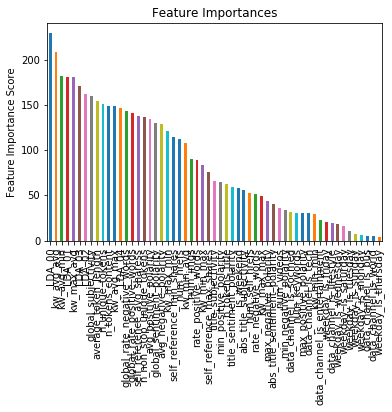

In [85]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, data, target.sharesB)

In [69]:
param_test1 = {
 'max_depth':list(range(3,10,2)),
 'min_child_weight':list(range(1,6,2))
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=176, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(data,target.sharesB)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.69445, std: 0.05614, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.69547, std: 0.05308, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.69563, std: 0.05380, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.68072, std: 0.06307, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.67869, std: 0.06202, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.68609, std: 0.05839, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.67465, std: 0.06031, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.67257, std: 0.06271, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.67625, std: 0.05867, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.66754, std: 0.06111, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.67005, std: 0.05964, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.67246, std: 0.05671, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 5

In [88]:
param_test2 = {
 'max_depth':[1,2,3],
 'min_child_weight':[5,6,7]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=176, max_depth=1,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(data,target.sharesB)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.70456, std: 0.03817, params: {'max_depth': 1, 'min_child_weight': 5},
  mean: 0.70456, std: 0.03817, params: {'max_depth': 1, 'min_child_weight': 6},
  mean: 0.70456, std: 0.03817, params: {'max_depth': 1, 'min_child_weight': 7},
  mean: 0.70200, std: 0.04522, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.70260, std: 0.04416, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.70250, std: 0.04440, params: {'max_depth': 2, 'min_child_weight': 7},
  mean: 0.69563, std: 0.05380, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.69702, std: 0.05269, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.69839, std: 0.05048, params: {'max_depth': 3, 'min_child_weight': 7}],
 {'max_depth': 1, 'min_child_weight': 5},
 0.7045576771758382)

In [75]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=176, max_depth=1,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(data,target.sharesB)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.70456, std: 0.03817, params: {'gamma': 0.0},
  mean: 0.70456, std: 0.03817, params: {'gamma': 0.1},
  mean: 0.70456, std: 0.03817, params: {'gamma': 0.2},
  mean: 0.70456, std: 0.03817, params: {'gamma': 0.3},
  mean: 0.70456, std: 0.03817, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.7045576771758382)

n_estimators : 176
cvresult : 0.7018179488636366

Model Report
Accuracy : 0.6643
AUC Score (Train): 0.723441
AUC Score (Test): 0.714051


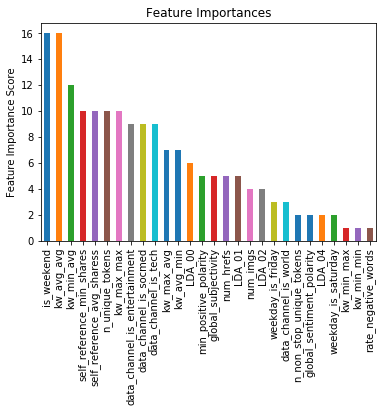

In [90]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=1,
 min_child_weight=5,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, data, target.sharesB)

In [91]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=176, max_depth=1,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(data,target.sharesB)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.70597, std: 0.03610, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.70497, std: 0.03697, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.70543, std: 0.03661, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.70469, std: 0.03800, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.70600, std: 0.03594, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.70559, std: 0.03637, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.70464, std: 0.03720, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.70480, std: 0.03757, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.70580, std: 0.03577, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.70526, std: 0.03708, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.70456, std: 0.03817, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.70463, std: 0.03763, params: {'colsample_bytree': 0.8, 'subsample'

In [93]:
param_test5 = {
 'subsample':[i/100.0 for i in range(60,80,5)],
 'colsample_bytree':[i/100.0 for i in range(50,70,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=176, max_depth=1,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(data,target.sharesB)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.70558, std: 0.03596, params: {'colsample_bytree': 0.5, 'subsample': 0.6},
  mean: 0.70578, std: 0.03620, params: {'colsample_bytree': 0.5, 'subsample': 0.65},
  mean: 0.70490, std: 0.03713, params: {'colsample_bytree': 0.5, 'subsample': 0.7},
  mean: 0.70561, std: 0.03616, params: {'colsample_bytree': 0.5, 'subsample': 0.75},
  mean: 0.70589, std: 0.03617, params: {'colsample_bytree': 0.55, 'subsample': 0.6},
  mean: 0.70561, std: 0.03715, params: {'colsample_bytree': 0.55, 'subsample': 0.65},
  mean: 0.70513, std: 0.03701, params: {'colsample_bytree': 0.55, 'subsample': 0.7},
  mean: 0.70556, std: 0.03605, params: {'colsample_bytree': 0.55, 'subsample': 0.75},
  mean: 0.70597, std: 0.03610, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.70591, std: 0.03669, params: {'colsample_bytree': 0.6, 'subsample': 0.65},
  mean: 0.70497, std: 0.03697, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.70589, std: 0.03577, params: {'colsample_bytree': 0.6, 's

In [97]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=176, max_depth=1,
 min_child_weight=5, gamma=0, colsample_bytree=0.6,subsample=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(data,target.sharesB)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_


([mean: 0.70597, std: 0.03610, params: {'reg_alpha': 1e-05},
  mean: 0.70597, std: 0.03610, params: {'reg_alpha': 0.01},
  mean: 0.70597, std: 0.03609, params: {'reg_alpha': 0.1},
  mean: 0.70618, std: 0.03585, params: {'reg_alpha': 1},
  mean: 0.70221, std: 0.03276, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.706176817006095)

In [99]:
param_test7 = {
 'reg_alpha':[10, 15, 20, 25,30]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=176, max_depth=1,
 min_child_weight=5, gamma=0, colsample_bytree=0.6,subsample=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(data,target.sharesB)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.70724, std: 0.03318, params: {'reg_alpha': 10},
  mean: 0.70705, std: 0.03274, params: {'reg_alpha': 15},
  mean: 0.70693, std: 0.03263, params: {'reg_alpha': 20},
  mean: 0.70696, std: 0.03247, params: {'reg_alpha': 25},
  mean: 0.70676, std: 0.03257, params: {'reg_alpha': 30}],
 {'reg_alpha': 10},
 0.7072357142274758)

n_estimators : 190
cvresult : 0.7314396189473679

Model Report
Accuracy : 0.7347
AUC Score (Train): 0.814070
AUC Score (Test): 0.731191


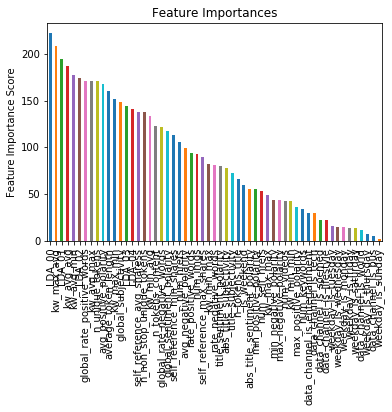

In [103]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=5,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.6,
 reg_alpha=10,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, data, target.sharesB)

n_estimators : 1948
cvresult : 0.7350757475359335

Model Report
Accuracy : 0.7396
AUC Score (Train): 0.821145
AUC Score (Test): 0.733489


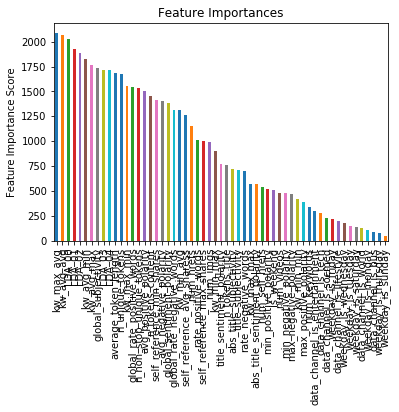

In [107]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=2000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.6,
 reg_alpha=10,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, data, target.sharesB)